In [55]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RANSACRegressor
import warnings
warnings.filterwarnings("ignore")

In [14]:
data=pd.read_csv("USA_Housing.csv")

In [15]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [16]:
# drop non-meaningfull column
data.drop(columns="Address",inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [ ]:
# Checking Data statics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


In [5]:
# Missing data check
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

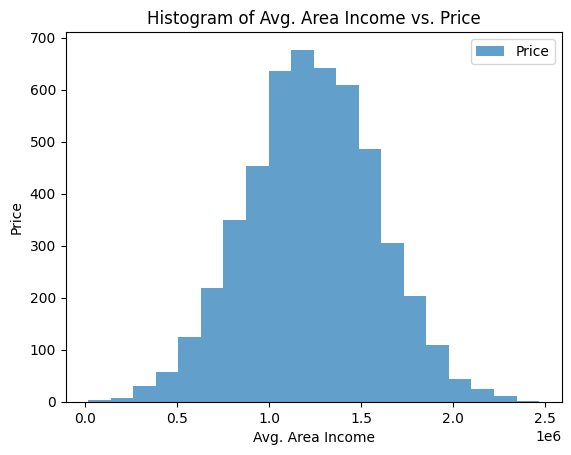

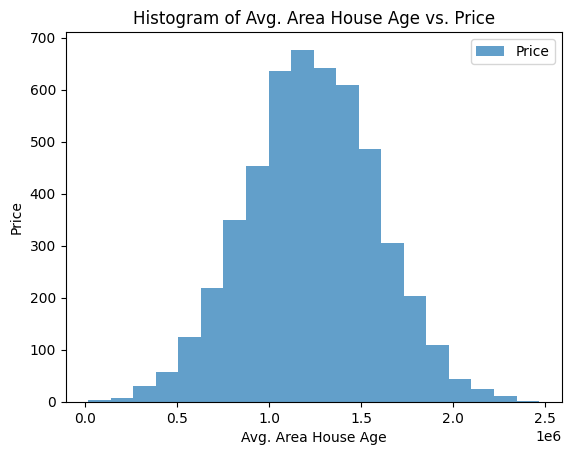

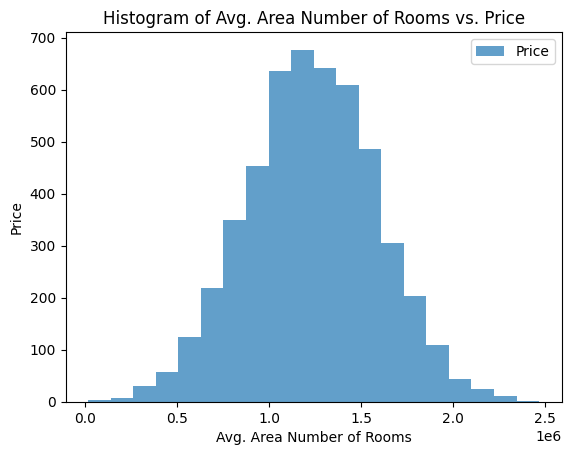

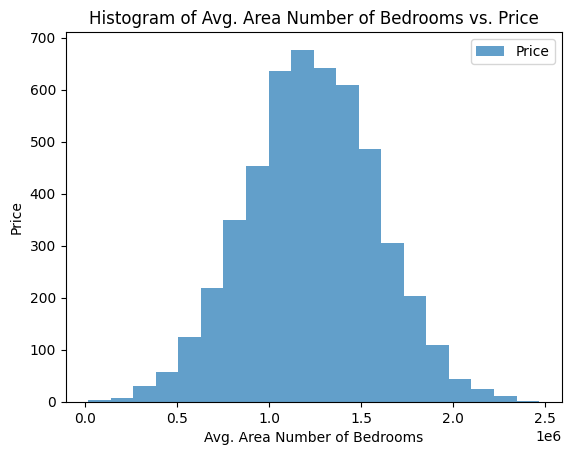

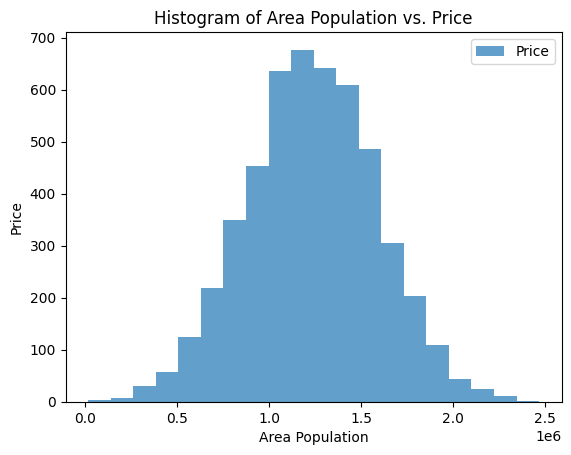

In [35]:
# Visualization
for i in data.columns[:-1]:
    data.plot.hist(x=i, y='Price', bins=20, alpha=0.7)
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.title(f'Histogram of {i} vs. Price')
    plt.show()

<AxesSubplot: >

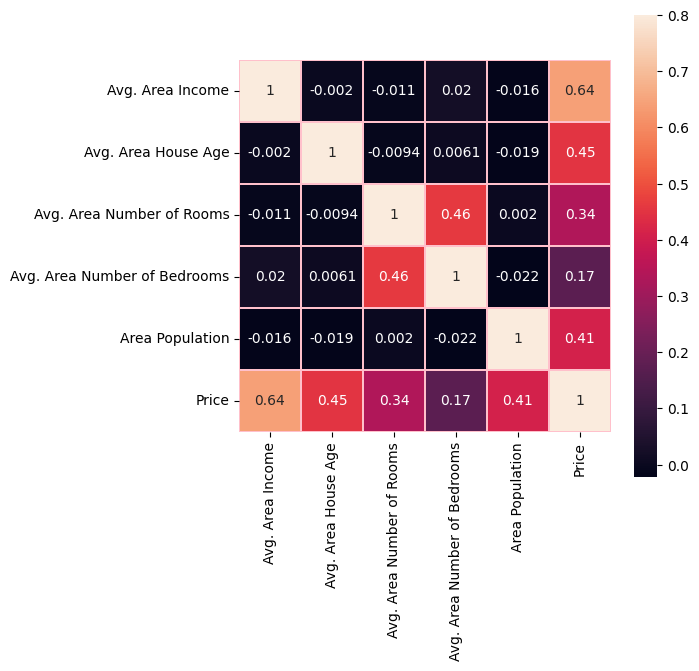

In [36]:
# Correlation map
corr=data.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr, vmax=.8, linewidths=0.05,square=True,annot=True,linecolor="pink")

In [37]:
y=data[['Price']]
x=data.drop(columns=['Price'])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [57]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)

In [44]:
model.score(X_train,y_train)

0.9179787435623722

In [45]:
model.score(X_test,y_test)

0.9179971706834288

In [63]:
# Intercept of Linear Regression
lr.intercept_

array([-2635072.90093336])

In [64]:
# Coefficient of Linear Regression
lr.coef_

array([[2.16522058e+01, 1.64666481e+05, 1.19624012e+05, 2.44037761e+03,
        1.52703134e+01]])

In [49]:
r2_score(y_test,lr.predict(X_test))

0.9179971706834288

In [71]:
def model(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    print("Model Score:", r2_score(y_test, lr.predict(X_test)))

In [72]:
model(x,y)

Model Score: 0.9179971706834289


In [51]:
enet_model = ElasticNet().fit(X_train, y_train)
y_pred = enet_model.predict(X_test)
r2_score(y_test, y_pred)

0.8735171828391082

In [60]:
model = RANSACRegressor(max_trials=10)
model.fit(X_train, y_train)

RANSACRegressor(max_trials=10)

In [62]:
r2_score(y_test, model.predict(X_test))

0.9103281361206665